# Convolution Neural Network

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import gradio as gr
import numpy as np
import os
from sklearn.utils import class_weight

2025-02-15 18:06:29.337825: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.16.2'

## Part 1 - Data Preprocessing

In [3]:
import cv2
data_dir = 'chest_xray'

### Preprocessing the Training set

In [4]:
import numpy as np

In [5]:
tf.keras.utils.image_dataset_from_directory??


Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [6]:
data = tf.keras.utils.image_dataset_from_directory('chest_xray/train',
                                                   image_size=(64, 64),
                                                   color_mode='grayscale')
val_data = tf.keras.utils.image_dataset_from_directory('chest_xray/val',
                                                   image_size=(64, 64),
                                                   color_mode='grayscale')
test_data = tf.keras.utils.image_dataset_from_directory('chest_xray/test',
                                                   image_size=(64, 64),
                                                   color_mode='grayscale')

Found 5216 files belonging to 2 classes.
Found 17 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()
data_iterator = val_data.as_numpy_iterator()
data_iterator = test_data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:

batch[0].shape


(32, 64, 64, 1)

In [10]:
# class 1 = pneumonia
# class 0 = normal
batch[1]

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

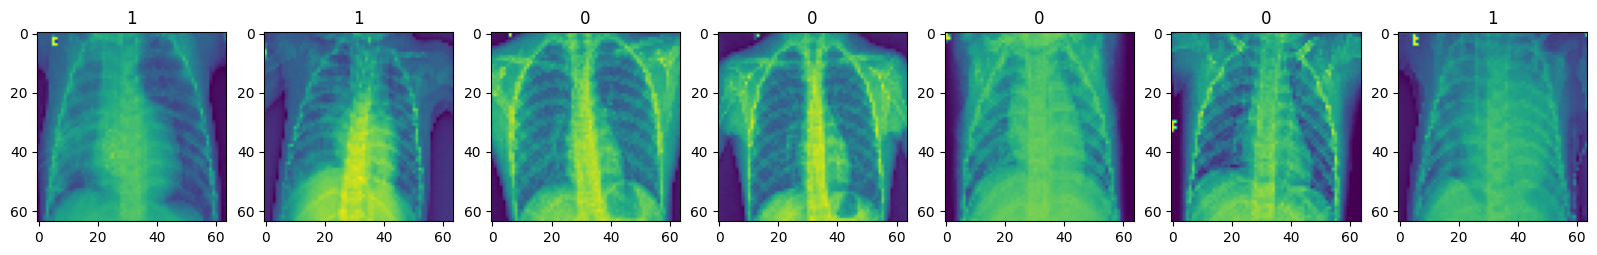

In [11]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
batch[0].min()

0.0

In [13]:
batch[0].max()

255.0

In [14]:
batch[0].shape

(32, 64, 64, 1)

In [15]:
scaled = batch[0]/255

In [16]:
scaled.max()

1.0

In [17]:
data = data.map(lambda x, y: (x/255, y))
val_data = val_data.map(lambda x, y: (x/255, y))
test_data = test_data.map(lambda x, y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

In [20]:
batch [0].min()

0.0

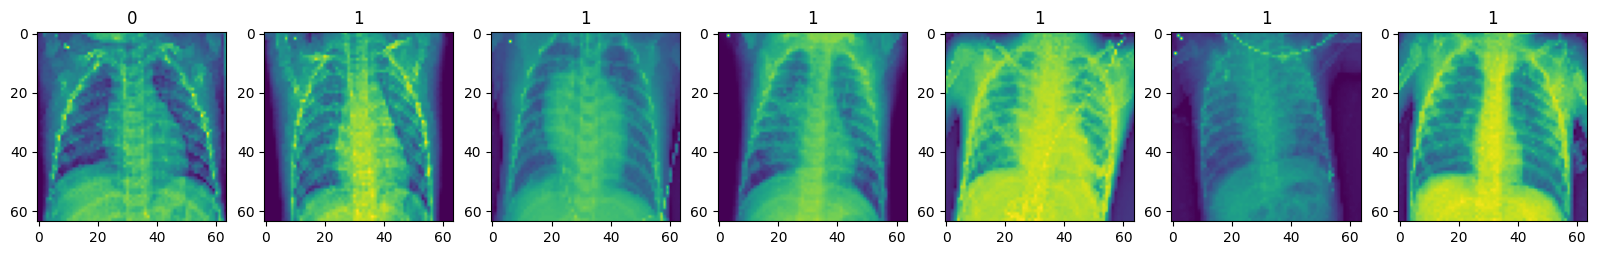

In [21]:
fig, ax = plt.subplots(ncols=7, figsize=(20,20))
for idx, img in enumerate(batch[0][:7]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomBrightness(0.25, seed=10),
#     tf.keras.layers.RandomContrast(0.5, seed=20),
#     tf.keras.layers.RandomRotation(0.028, fill_mode="constant", seed=35),
# ])

# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    rotation_range=20,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)
# #train_datagen = data_augmentation
# training_set = train_datagen.flow_from_directory('chest_xray/train',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')
# #training_set = data_augmentation

### Preprocessing the Test set

In [ ]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
# test_set = test_datagen.flow_from_directory('chest_xray/test',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

In [ ]:
# Visualize augmented images
# def show_augmented_images():
#     plt.figure(figsize=(10, 10))
#     for i in range(9):
#         plt.subplot(3, 3, i + 1)
#         batch = next(training_set)
#         image = batch[0][0]
#         plt.imshow(image)
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()

# show_augmented_images()

## Part 2 - Builind the CNN

### Initialising the CNN

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [23]:
model = Sequential()

### Step 1 -Convolution

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=[64, 64,1]))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 -Pooling

In [25]:
model.add(MaxPooling2D())

### Adding a second convolutional layer

In [26]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

### Step 3 -Flattening

In [27]:
model.add(Flatten())

### Step 4 -Full Connection

In [28]:
model.add(Dense(units=256, activation='relu'))

### Step 5 -Output Layer

In [29]:
model.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [30]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics =['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,393 (614.82 KB)

 Trainable params: 157,393 (614.82 KB)

 Non-trainable params: 0 (0.00 B)

### Training the CNN on the Training set and evaluating it on the Test Set

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:


hist = model.fit(x = data, validation_data=test_data, epochs = 20, callbacks=[tensorboard_callback])

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.7709 - loss: 0.4750 - val_accuracy: 0.7035 - val_loss: 0.8525
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9327 - loss: 0.1765 - val_accuracy: 0.7917 - val_loss: 0.4860
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9528 - loss: 0.1209 - val_accuracy: 0.7612 - val_loss: 0.7042
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9662 - loss: 0.0898 - val_accuracy: 0.7436 - val_loss: 0.8601
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9738 - loss: 0.0756 - val_accuracy: 0.7308 - val_loss: 1.0660
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9728 - loss: 0.0730 - val_accuracy: 0.7179 - val_loss: 1.1594
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9805 - loss: 0.0551 - val_accuracy: 0.7308 - val_loss: 1.1847
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9804 - loss: 0.0531 - val_accu

In [39]:
class_weight.compute_class_weight??

Signature: class_weight.compute_class_weight(class_weight, *, classes, y)
Source:   
@validate_params(
    {
        "class_weight": [dict, StrOptions({"balanced"}), None],
        "classes": [np.ndarray],
        "y": ["array-like"],
    },
    prefer_skip_nested_validation=True,
)
def compute_class_weight(class_weight, *, classes, y):
    """Estimate class weights for unbalanced datasets.

    Parameters
    ----------
    class_weight : dict, "balanced" or None
        If "balanced", class weights will be given by
        `n_samples / (n_classes * np.bincount(y))`.
        If a dictionary is given, keys are classes and values are corresponding class
        weights.
        If `None` is given, the class weights will be uniform.

    classes : ndarray
        Array of the classes occurring in the data, as given by
        `np.unique(y_org)` with `y_org` the original class labels.

    y : array-like of shape (n_samples,)
        Array of original class labels per sample.

    Returns

In [34]:
hist.history

{'accuracy': [0.8521856069564819,
  0.9422929286956787,
  0.9574386477470398,
  0.967024564743042,
  0.9722009301185608,
  0.9722009301185608,
  0.9800613522529602,
  0.9798696041107178,
  0.9794861674308777,
  0.9815950989723206,
  0.9821702241897583,
  0.9863880276679993,
  0.9861963391304016,
  0.9886886477470398,
  0.9913727045059204,
  0.9930981397628784,
  0.9917561411857605,
  0.9898389577865601,
  0.9938650131225586,
  0.9967408180236816],
 'loss': [0.32393118739128113,
  0.14983145892620087,
  0.1111062541604042,
  0.08595304936170578,
  0.07699275761842728,
  0.07309489697217941,
  0.057160262018442154,
  0.05492698401212692,
  0.05176820233464241,
  0.04583269730210304,
  0.04326656088232994,
  0.037206217646598816,
  0.03503507748246193,
  0.028850266709923744,
  0.024606900289654732,
  0.021855855360627174,
  0.0216883085668087,
  0.023386776447296143,
  0.018356965854763985,
  0.009555300697684288],
 'val_accuracy': [0.7035256624221802,
  0.7916666865348816,
  0.761217951

### Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

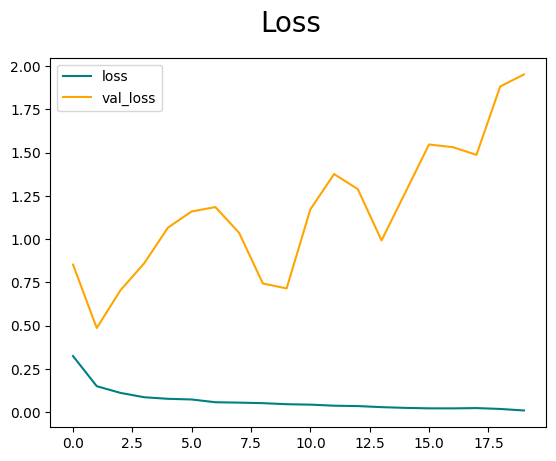

In [35]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

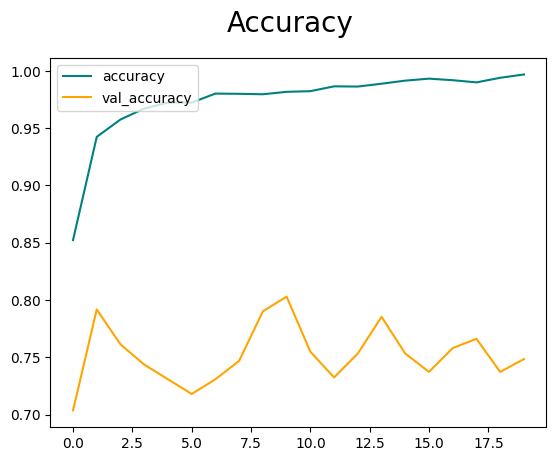

In [36]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show

# Part 4 -Making a single prediction

In [37]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [38]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [39]:
for batch in val_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


2025-02-15 18:11:00.550463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [40]:
print(f'Prescision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Prescision:0.5714285969734192, Recall:1.0, Accuracy:0.6470588445663452


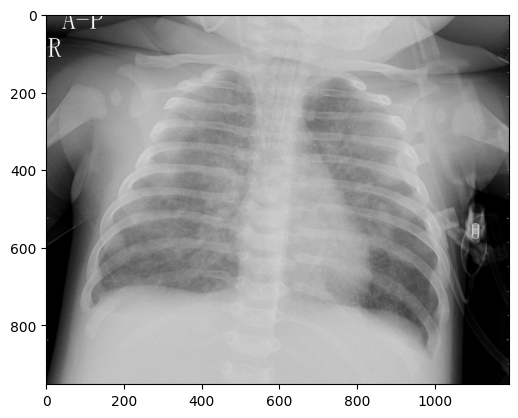

In [95]:
import cv2
img = cv2.imread('chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg', 0)
plt.imshow(img, cmap='gray')
plt.show()

In [107]:
img = np.expand_dims(img, axis=-1)
resize = tf.image.resize(img, (64, 64))


In [108]:
resize.shape

TensorShape([64, 64, 1])

In [109]:
np.expand_dims(resize, 0).shape

(1, 64, 64, 1)

In [110]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


I0000 00:00:1739670852.390697 5314481 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [79]:
yhat

array([[9.9999189e-01],
       [1.0000000e+00],
       [9.9999911e-01],
       [1.8124295e-04],
       [9.9999702e-01],
       [2.7542612e-02],
       [8.5835040e-01],
       [9.9376053e-01],
       [9.8123830e-03],
       [9.7517180e-01],
       [9.9987817e-01],
       [9.9999261e-01],
       [9.9842876e-01],
       [6.4745265e-01],
       [9.9376053e-01],
       [8.6045122e-01],
       [9.9973238e-01]], dtype=float32)

In [111]:
if yhat > 0.5:
    print(f'Predicted class is Pneumonia')
else:
    print(f'Predicted class is Normal')

Predicted class is Pneumonia


# Save the model

In [112]:
from tensorflow.keras.models import load_model
import os

In [117]:
model.save(os.path.join('model','pneumoniamodel.keras'))

In [119]:
new_model = load_model(os.path.join('model', 'pneumoniamodel.keras'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [120]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[0.9999925]], dtype=float32)

In [ ]:


# val_datagen = ImageDataGenerator(rescale = 1./255)
# val_set = val_datagen.flow_from_directory('chest_xray/val',
#                                             target_size = (64, 64))
predictions = model.predict(test_set)
# for i in range(5):
#     plt.imshow(test_set[i])
#     plt.title(f'Predicted: {predictions[i].argmax()}, True: {y_test[i]}')
#     plt.show




#  plt.figure(figsize=(10, 10))
#     for i in range(9):
#         plt.subplot(3, 3, i + 1)
#         batch = next(training_set)
#         image = batch[0][0]
#         plt.imshow(image)
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()

# # def predict_image(img):
#     img_2d.resahape(64, 64, 3)
#     predict=model(img_2d)[0]
#     return {class-name[i]: float(predict[i]) for i in range(2)}

# image = gr.inputs.Image(shape=(64, 64))
# label = gr.outputs.Label(num_top_classes=2)

# gr.Interface(fn=pridict_image, inputs=image, outputs=label, capture_session=True).launch(debug='True')






# import numpy as np
# from tensorflow.keras.preprocessing import image
# def predict_image(img):
#     test_image = image.load_img('img', target_size = (64, 64))
#     test_image = image.img_to_array(test_image)
#     test_image = np.expand_dims(test_image, axis = 0)
#     result = cnn.predict(test_image)
#     training_set.class_indices
#     if result[0][0] == 1:
#       prediction = 'pneumonia'
#     else:
#       prediction = 'not pneumonia'
#     return prediction
    
# image = gr.inputs.Image(shape=(64, 64))
# label = gr.outputs.Label(num_top_classes=2)

# gr.Interface(fn=pridict_image, inputs=image, outputs=label, capture_session=True).launch(debug='True')
# predict()       

In [ ]:
model.save('predict_cnn_pneumonia.keras')

In [ ]:
print(prediction)